<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/Combing_Merging_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Combining and Merging Datasets   

This notebook is based on [Section 8.2 Combining and Merging Datasets](https://wesmckinney.com/book/data-wrangling.html#prep_merge_join) from Chapter 8 - Data Wrangling: Join, Combine, and Reshape in Wes Mckinney's 'Python for Data Analysis'    



Data contained in pandas objects can be combined together in a number of ways:

`pandas.merge` connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.

`pandas.concat` concatenates or "stacks" together objects along an axis.

The `combine_first` instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

`pandas.merge_asof` allows you to do time series-based "window" joins between DataFrame objects. This will be discussed in more detail in Time Series

Mckinney addresses each of these and gives a number of examples. They will be utilized in examples throughout the remainder of the Data Analysis with Python book.



---



##**Housekeeping**    

Import required modules    


In [2]:
# Import pandas 
import pandas as pd

# Import numpy   
import numpy as np




---




##Database-Style Dataframe Joins    

*Merge* or *join* operations combine datasets by linking rows using one or more keys. These operations are particularly important in relational databases (e.g., SQL-based). The `merge` function in pandas is the main entry point for using these algorithms on your data.

Let’s start with a simple example:

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})


In [ ]:
print(df1.describe())
print()
print(df1)

In [ ]:
print(df2.describe())
print()
print(df2)

The following is an example of a *many-to-one join*; the data in `df1` has multiple rows labeled `a` and `b`, whereas `df2` has only one row for each value in the key column. Calling `merge` with these objects we obtain:

In [ ]:
pd.merge(df1, df2)

Note that the last snippet of code DID NOT specify which column to join on. If that information is not specified, `merge` uses the overlapping column names as the keys. It’s a good practice to specify explicitly, though:

In [ ]:
pd.merge(df1, df2, on='key')

If the column names are different in each object, you can specify them separately:

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)}) 

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [ ]:
print(df3.describe())
print()
print(df3)

In [ ]:
print(df4.describe())
print()
print(df4)

In [ ]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

You may notice that the 'c' and 'd' values and associated data are missing from the result. By default `merge` does an 'inner' join; the keys in the result are the intersection, or the common set found in both tables. Other possible options are 'left', 'right', and 'outer'. The *outer join* takes the union of the keys, combining the effect of applying both *left* and *right joins*:

In [ ]:
pd.merge(df1, df2, how='outer')

See the following **Table 8.1** for a summary of the options for how different *joins* are treated.

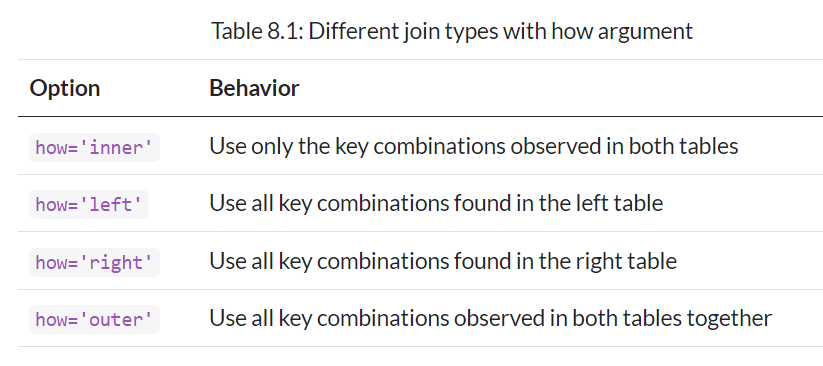

*Many-to-many* merges form the Cartesian product of the matching keys. Here’s an example:

In [ ]:
df5 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})

df6 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)}) 


In [ ]:
print(df5.describe())
print()
print(df5)

In [ ]:
print(df6.describe())
print()
print(df6)

In [ ]:
pd.merge(df5, df6, on='key', how='left')

Since there were three 'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the result. The `join` method only affects the distinct key values appearing in the result:

In [ ]:
pd.merge(df5, df6, how='inner')

To `merge` with multiple keys, pass a list of column names:


In [ ]:
df_left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
 
df_right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})


In [ ]:
print(df_left.describe())
print()
print(df_left)

In [ ]:
print(df_right.describe())
print()
print(df_right)

In [ ]:
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

To determine which key combinations will appear in the result depending on the choice of merge method, think of the multiple keys as forming an array of tuples to be used as a single join key.

***Caution***    


*When you're joining columns-on-columns, the indexes on the passed DataFrame objects are discarded.*

A last issue to consider in `merge` operations is the treatment of overlapping column names. While you can address the overlap manually (see the earlier section on renaming axis labels), `merge` has a `suffixes` option for specifying strings to append to overlapping names in the *left* and *right* DataFrame objects:

In [ ]:
pd.merge(df_left, df_right, on='key1')

In [ ]:
pd.merge(df_left, df_right, on='key1', suffixes=('_left', '_right'))

See **Table 8.2** for an argument reference on merge. Joining using the DataFrame's row index is the subject of the next section.

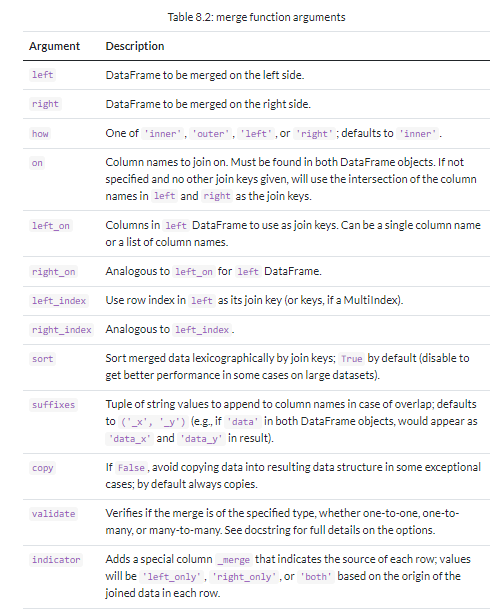



---



##Merging on Index    

In some cases, the `merge` key(s) in a DataFrame will be found in its index (row labels). In this case, you can pass `left_index=True` or `right_index=True` (or both) to indicate that the index should be used as the merge key:

In [3]:
df_left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                         'value': range(6)})

df_right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [ ]:
print(df_left1.describe())
print()
print(df_left1)

In [ ]:
print(df_right1.describe())
print()
print(df_right1)

In [ ]:
pd.merge(df_left1, df_right1, left_on='key', right_index=True)

Since the default `merge` method is to intersect the join keys, you can instead form the *union* of them with an *outer join*:

In [ ]:
pd.merge(df_left1, df_right1, left_on='key', right_index=True, how='outer')

With hierarchically indexed data, things are more complicated, as joining on index is equivalent to a multiple-key merge:

In [7]:
df_lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                                  'Nevada', 'Nevada'],
                         'key2': [2000, 2001, 2002, 2001, 2002],
                         'data': np.arange(5.)})

In [8]:
df_righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                         index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                                 'Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                         columns=['event1', 'event2'])

In [ ]:
print(df_lefth.describe())
print()
print(df_lefth)

In [ ]:
print(df_righth.describe())
print()
print(df_righth)

In this case, you have to indicate multiple columns to `merge` on as a list (note the handling of duplicate index values with `how='outer'`):

In [ ]:
pd.merge(df_lefth, df_righth, left_on=['key1', 'key2'], right_index=True)

In [ ]:
pd.merge(df_lefth, df_righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

Using the indexes of both sides of the `merge` is also possible:

In [15]:
df_left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                         index=['a', 'c', 'e'],
                         columns=['Ohio', 'Nevada'])

In [16]:
df_right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=['b', 'c', 'd', 'e'],
                          columns=['Missouri', 'Alabama'])

In [ ]:
print(df_left2.describe())
print()
print(df_left2)

In [ ]:
print(df_right2.describe())
print()
print(df_right2)

In [ ]:
pd.merge(df_left2, df_right2, how='outer', left_index=True, right_index=True)

DataFrame has a `join` instance method to simplify *merging* by index. It can also be used to *combine* together many DataFrame objects having the same or similar indexes but non-overlapping columns. In the prior example, we could have written:

In [ ]:
df_left2.join(df_right2, how='outer')

Compared with `pandas.merge`, DataFrame’s `join` method performs a *left join* on the *join keys*, exactly preserving the left frame's row index. It also supports *joining* the index of the passed DataFrame on one of the columns of the calling DataFrame:

In [ ]:
# print(df_left1.describe())
# print()
print(df_left1)

In [ ]:
# print(df_right1.describe())
# print()
print(df_right1)

In [20]:
df_left1.join(df_right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


You can think of this method as *joining* data **"into"** the object whose `join` method is invoked.

Lastly, for simple *index-on-index merges*, you can pass a list of DataFrames to `join` as an alternative to using the more general `concat` function described in the next section:

In [22]:
df_another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                           index=['a', 'c', 'e', 'f'],
                           columns=['New York', 'Oregon'])

In [ ]:
print(df_another.describe())
print()
print(df_another)

In [ ]:
df_left2.join([df_right2, df_another])

In [ ]:
df_left2.join([df_right2, df_another], how='outer')



---



##Concatenating Along an Axis    

Another kind of data combination operation is referred to interchangeably as concatenation or stacking. NumPy's concatenate function can do this with NumPy arrays:



---





---



#**Related Exercise**


*See the notebook ['NOTEBOOKNAME'](https://bit.ly/some_link) for a related exercise on combining datasets.* 



---

